# Define libraries that is required for the project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the source "CSV" file

In [3]:
data = pd.read_csv("/content/netflix_Bussiness Case Study.csv")  # File path defined to read
df = pd.DataFrame(data)  # Transformed to Data frame
df.head()    # Pulling just the first 5 rows of data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print("SHAPE:",df.shape)
print()
print("Information :",df.info())

SHAPE: (8807, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Information : None


## COLUMNS:
'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'

## Netflix Bussiness Case Study
- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

# Objective:
Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

## Step 1:

Understand each column very well. What information each column contain?
Understand how we can use this data to leverage and find solution to our objective

In [6]:
df.rename(columns={'listed_in':'Genre'},inplace = True) # Renaming old field to new (listed in to Genre)

#changing the Title to Movie - Column name is simplt renamed
df.rename(columns = {'title':'Movie'} , inplace = True)
df

,show_id,type,Movie,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# DATA CLEANING - DATA COMPLETENESS
# Following have been observed as discripency
1.The column "Genre" , each row has multiple genre , like International TV Shows, TV Dramas, TV Mysteries.
2. column duration" has few blanks , need to fill
3. column "rating" has few blanks , need to fill
4. column 'date_added' has date format issue, i observed , DD/MM/YYYY , jan /dd/yyyy and few blanks..
5. Column 'country' has format issue , few countries have "," before the start of the country and there are few blanks
6. column 'cast' has few blanks
7. column 'director' has few blanks
8. column 'title' has some random numbers , dates

#NON GRAPHICAL ANALYSIS

In [7]:
#column "duration" has few blanks , need to fill- 90 min for Movie and '1 Season' for TVShow
# column "rating" - missing values , filling with most used "TV-MA"
# column  "date_added"  -  Inconsistent formats like "15/01/2020", "Jan 5, 2020", and blanks pd.to_datetime() with errors='coerce'
# column  "country" - commas / whitespace and blanks
# column "cast" - missing values - fill with "not available"

'''TV Shows, duration is in "Seasons"; for Movies, it's in "minutes".
"1 Season" if type is TV Show
"90 min" if type is Movie (most common length)'''


#column "duration"  1 Season -> TV show and 90 min -> Movie
# df['duration'] = df.apply(
#     lambda row: '1 Season' if (pd.isnull(row['duration']) and row['type'] == 'TV Show')
#     else '90 min' if (pd.isnull(row['duration']) and row['type'] == 'Movie')
#     else row['duration'], axis=1
# )

# column "rating" replace Nan with typically "TV-MA"
# df['rating'] = df['rating'].fillna('TV-MA')



# column  "date_added"
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') #converts all  date formats into a standard YYYY-MM-DD format.
df['date_added'].fillna('Unknown', inplace=True)  # Example default



# column "cast"
df['cast'] = df['cast'].fillna('Unknown')



# print(df)
# print("Sum of null or na values for 'Duration' are :" ,df['duration'].isna().sum())


<ipython-input-7-9382b4889ef6>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna('Unknown', inplace=True)  # Example default
<ipython-input-7-9382b4889ef6>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['date_added'].fillna('Unknown', inplace=True)  # Example default


In [8]:
# column  "country"
df['country'] = df['country'].str.strip().str.lstrip(',').fillna('Unknown') # removes whitespace,removes comma start of the word,replaces na with Unknown

print(df['country'].isna().sum())


0


In [9]:
# column "rating" replace Nan with typically "TV-MA"
# df['rating'].fillna(df['rating'].mode()[0], inplace=True)
print("Before:", df['rating'].isna().sum())
df['rating'] = df['rating'].fillna('TV-MA')
print("After:", df['rating'].isna().sum())

Before: 4
After: 0


In [10]:
# column  "date_added"

print(df['date_added'].isna().sum())
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') #converts all  date formats into a standard YYYY-MM-DD format.
df['date_added'].fillna('Unknown', inplace=True)
print(df['date_added'].isna().sum())


0
0


<ipython-input-10-232dd6f6dc13>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna('Unknown', inplace=True)
<ipython-input-10-232dd6f6dc13>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['date_added'].fillna('Unknown', inplace=True)


In [11]:
print(df['date_added'].isna().sum())

0


In [12]:
#column "duration"  1 Season -> TV show and 90 min -> Movie
df['duration'] = df.apply(
    lambda row: '1 Season' if (pd.isnull(row['duration']) and row['type'] == 'TV Show')
    else '90 min' if (pd.isnull(row['duration']) and row['type'] == 'Movie')
    else row['duration'], axis=1)
df['duration'].isna().sum()

np.int64(0)

In [13]:
# column "cast"
df['cast'] = df['cast'].fillna('Unknown')
df['cast'].isna().sum()

np.int64(0)

In [14]:
df['Movie'] = df['Movie'].str.lstrip('#')
print(df['Movie'].isna().sum())

0


In [15]:
df['director'] = df['director'].fillna('Unknown')
print(df['director'].isna().sum())

0


In [16]:
print(df['country'].isna().sum())
print(df['cast'].isna().sum())
print(df['duration'].isna().sum())
print(df['date_added'].isna().sum())
print(df['rating'].isna().sum())
print(df['director'].isna().sum())
print(df['Movie'].isna().sum())

0
0
0
0
0
0
0


In [17]:
df.columns

Index(['show_id', 'type', 'Movie', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

In [18]:
# df['Genre']  # Genre having many each row and are seperated by comma

# df['Genre']
# print(df['Listed_in'].isna().sum())
# print(df.columns)
# print(df['Genre'].dtype)  # checking if genre column is str or not
df


,show_id,type,Movie,director,cast,country,date_added,release_year,rating,duration,Genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20 00:00:00,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01 00:00:00,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
# pip install openpyxl
df.to_excel("cleaned_data.xlsx", sheet_name="Cleaned_Data", index=False)

## Exploring Few questions:
- What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.
- Does Netflix have more focus on TV Shows than movies in recent years
- Understanding what content is available in different countries **bold text**


1.What type of content is available in different countries?

In [20]:
'''focus will be Genre and Country ,for Genre , we have many content for each row , need to get the unique value in series'''
country_genre = df.groupby('country')['Genre'].value_counts()
country_genre.head()



country           Genre                                                            
 France, Algeria  Dramas, Independent Movies, International Movies                     1
 South Korea      International TV Shows, TV Dramas                                    1
Argentina         Stand-Up Comedy                                                      8
                  Crime TV Shows, International TV Shows, Spanish-Language TV Shows    6
                  Dramas, International Movies                                         6
Name: count, dtype: int64

# "Genre "  Insights
- Dramas & International Movies Dominate → With 362 titles, this genre shows the strong demand for emotional storytelling
- Documentaries  & Stand-Up Comedy -Hold a Strong Presence



#Recommendation:
- Expand International Productions → With Dramas, International Movies leading, Netflix should continue investing in global storytelling.
- Boost Stand-Up Comedy Specials
- Expand Regional Personalization - increases engagement and retention.


## Final Verdict :
- Netflix can stay on top in the streaming world by Expanding into new regions, investing in the right genres that resonate with audiences, and finding fresh ways to keep viewers engaged


In [21]:
print(df['Genre'].value_counts().sort_values(ascending = False).head())
print(df['Genre'].value_counts().sort_values(ascending = False).tail())


Genre
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64
Genre
Action & Adventure, Sci-Fi & Fantasy, Thrillers               1
TV Action & Adventure, TV Dramas, Teen TV Shows               1
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy    1
Children & Family Movies, Classic Movies, Dramas              1
Cult Movies, Dramas, Thrillers                                1
Name: count, dtype: int64


# MOVIE VS TV SHOWS

- Analysis shows that movies are watched more frequently than TV shows.
- Viewership breakdown: 70% movies, 30% TV shows.


In [22]:
df["type"].value_counts(normalize=True)

,proportion
type,
Movie,0.696151
TV Show,0.303849


# Same has been observed on a Barplot
- Analysis shows that movies are watched more frequently than TV shows.
- Viewership breakdown: 70% movies, 30% TV shows.
- Observation is that Movies are more popular it seems.

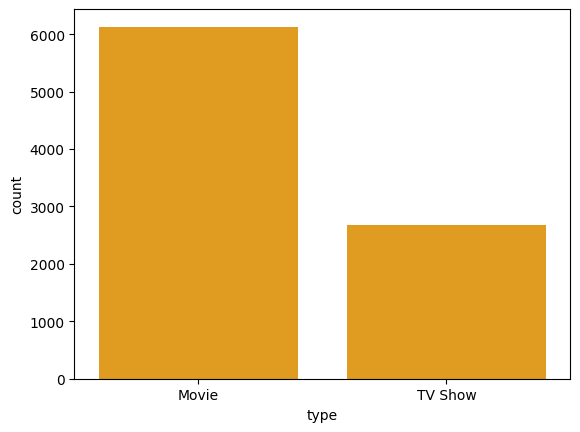

In [23]:
sns.countplot(x = df["type"], color="orange")
plt.show()

 # Top 5 Popular Genres

In [24]:
'''splitting at Comma , seperating each other to know which is most popular as individual'''
df["Genre"] = df["Genre"].str.split(",")


In [25]:
all_genre = []
for rows in df["Genre"]:
    all_genre.extend(rows)

all_genre_unique = list(set(all_genre))

In [26]:
len(all_genre_unique)

73

# Insights from Top 5 Genres
 - Dramas & International Movies Lead: This suggests a strong demand
 - Documentaries Have High Engagement: indicates viewers appreciate informative content
 - Stand-Up Comedy is Thriving

# Recomendation for Netflix's Business Growth

- Expand International Productions
- Invest more resources into Stand-Up & Documentaries
- Action & Adventure may not be Netflix’s strongest genre for engagement.
- Documentaries despite high engagement still low in rank due to specific audience interests




In [27]:
top_5_popular_genre = pd.Series(all_genre).value_counts().head()
top_5_popular_genre

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829


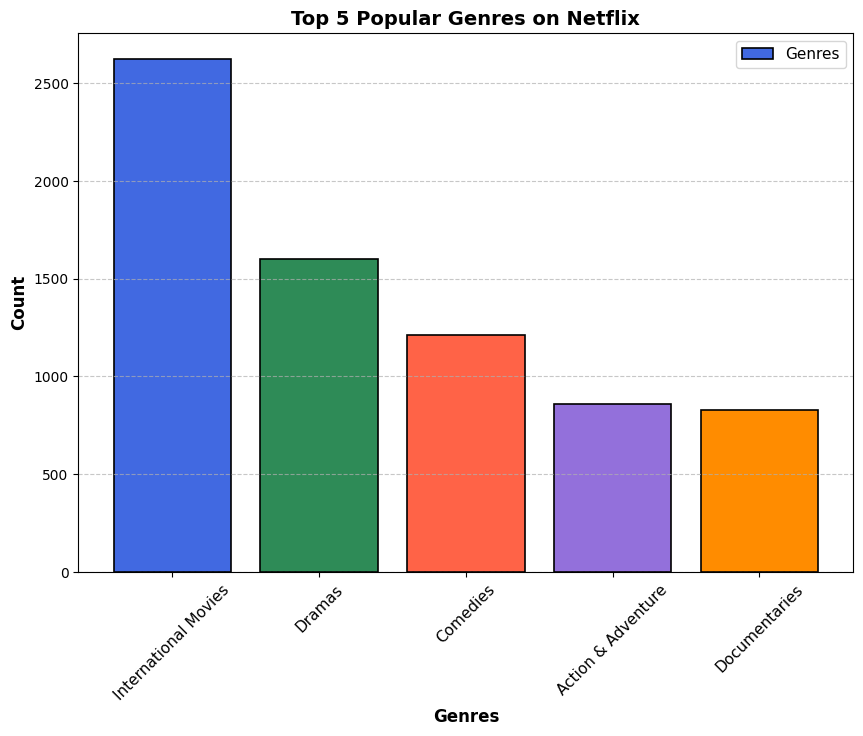

In [28]:
import matplotlib.pyplot as plt

# Data
Genres = ["International Movies", "Dramas", "Comedies", "Action & Adventure", "Documentaries"]
counts = [2624, 1600, 1210, 859, 829]
colors = ['royalblue', 'seagreen', 'tomato', 'mediumpurple', 'darkorange']

# Create figure
plt.figure(figsize=(10, 7))

# Plot bar chart
bars = plt.bar(Genres, counts, color=colors, edgecolor='black', linewidth=1.2)


# Labels and title
plt.xlabel("Genres", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Top 5 Popular Genres on Netflix", fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=11)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(["Genres"], loc='upper right', fontsize=11, frameon=True)

# Show plot
plt.show()

# 2. How has the number of movies released per year changed over the last 20-30 years?

In [29]:
'''Going to refer to these two columns "Movie" and "release_year"'''
df_filtered = df[df['release_year'] >= (2021 - 30)] # substracting 30 from 2021
df_filtered = df_filtered[['Movie','release_year']]
df_filtered


,Movie,release_year
0,Dick Johnson Is Dead,2020
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021
...,...,...
8802,Zodiac,2007
8803,Zombie Dumb,2018
8804,Zombieland,2009
8805,Zoom,2006


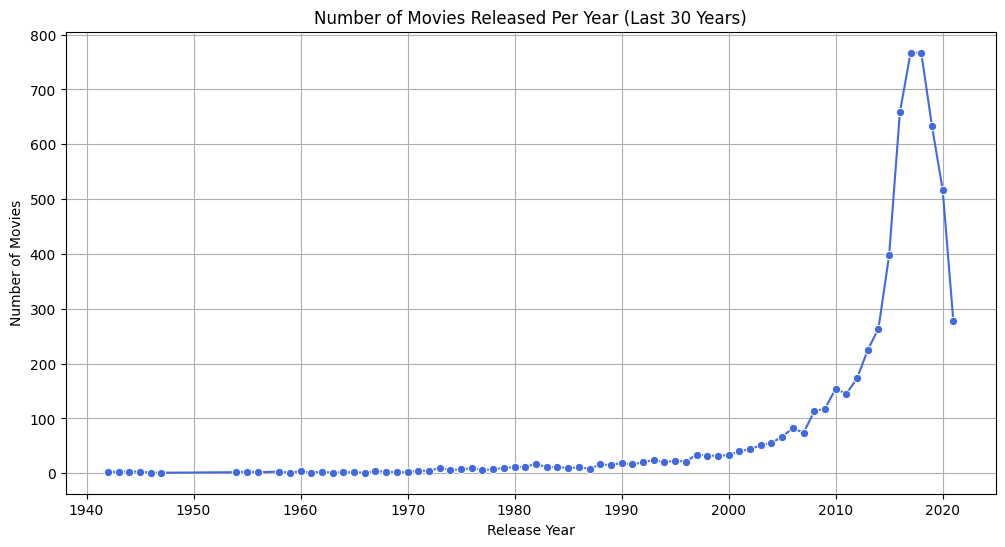

In [30]:
'''Plotting a graph for movie vs last 30 years'''
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='release_year', y='count', marker='o', color='royalblue')
plt.title("Number of Movies Released Per Year (Last 30 Years)")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


## GRAPH INSIGHTS - movie release over last 30 years

- Steady Growth from 2000 to 2010 → The graph shows a gradual increase in movie releases starting around 2000, must be due to release of netflix and other streaming services
- Sharp Decline After 2020 → Might be related to the COVID-19 pandemic affecting production and releases.
- Minimal Releases before 1990s → The number of movies released before the 1990s is noticibily  low
- Before 2010, the rise looked  steady, but it exploded in the 2010s , again due to streaming services

## Recomendation:
- Prioritize TV Shows for Long-Term Engagement
TV shows have seen consistent growth, while movie production peaked and declined after 2018.
-Expand Global Content Production
The dominance of International Movies & Dramas highlights a strong demand for culturally diverse stories. Netflix should collaborate with local filmmakers
-Invest Heavily in Stand-Up Comedy & Documentaries , Comedy specials and documentaries are among the top-performing genres,



# 3.Comparison of Tv shows vs. Movies.

- type
Movie      6131
TV Show    2676

In [31]:
## Focus more on the type , count movie vs count TV Show
type_counts = df['type'].value_counts()   # this gives the count of movie vs TV show
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [32]:
type_trends = df.groupby(['release_year', 'type']).size().reset_index(name='count')
type_trends  # this will group type with releaseyear and also count movie and tv show as per year

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


#  lets compare both by release_year , will use plot chart

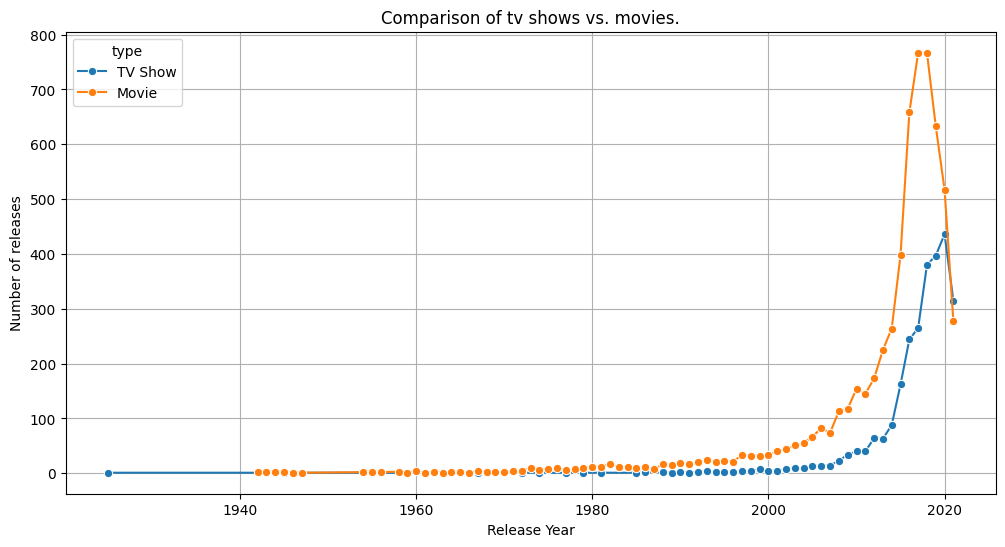

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=type_trends, x='release_year', y='count', marker='o', hue = 'type')

plt.title("Comparison of tv shows vs. movies.")
plt.xlabel("Release Year")
plt.ylabel("Number of releases")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Insights:
- TV shows has risen up recent years however movies streaming has always been dominating over the years
- 2016-2018 has been the peak for movies streaming
- movies and TV shows have taken a hit post 2020 , posibility due to COvid 19 , which inturn stopped production
- Movie and tv show gap is narrowing , indicating that netflix has invested heaviliy on tv show as well , this shows higher rentention for the other audiance

# Recomendation:
-  Strengthen Investments in TV Show Production
TV show releases have seen significant growth, surpassing movies in recent years.
- Expand  Partnerships for Global Reach,


# Final
-  By focusing on TV shows,  global partnerships, Netflix can sustain its leadership in streaming while aligning with evolving viewer demands.



# Univariate Visualizations

<Axes: xlabel='type', ylabel='count'>

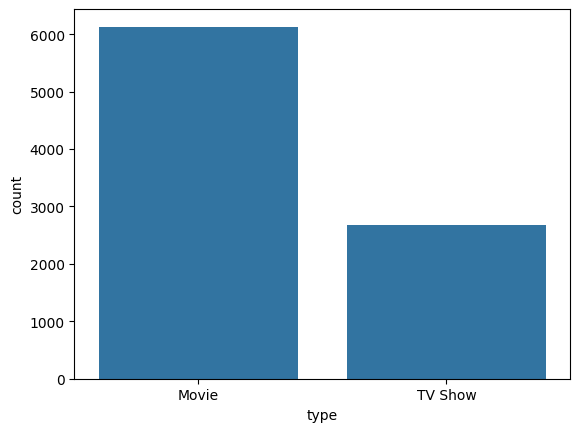

In [34]:
sns.countplot(data=df, x='type')

# TV - MA Insight
- Dominance of Mature Content , indicates strong preference for adult-oriented shows.
- Limited Demand for Restricted Content:NC-17" and "UR" indicating minimal demand for extreme adult-rated content.
- The most common content type is TV Shows, making up ~60% of total titles in recent years.

# Recomendation
- Expand Mature Content Offerings
- Strengthen Family-Friendly invest more TV-PG" and "TV-G" rated content,





([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR'),
  Text(14, 0, '74 min'),
  Text(15, 0, '84 min'),
  Text(16, 0, '66 min')])

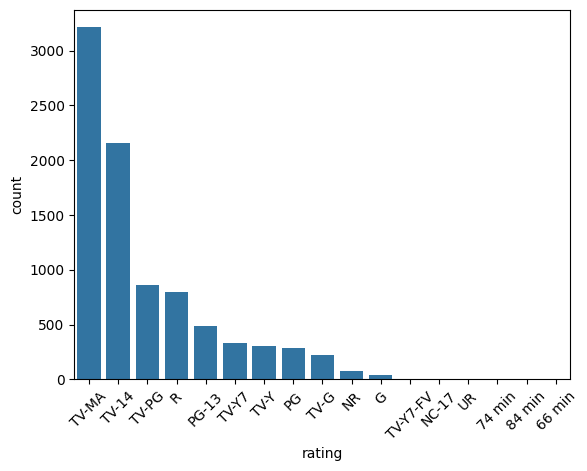

In [35]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation= 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR')])

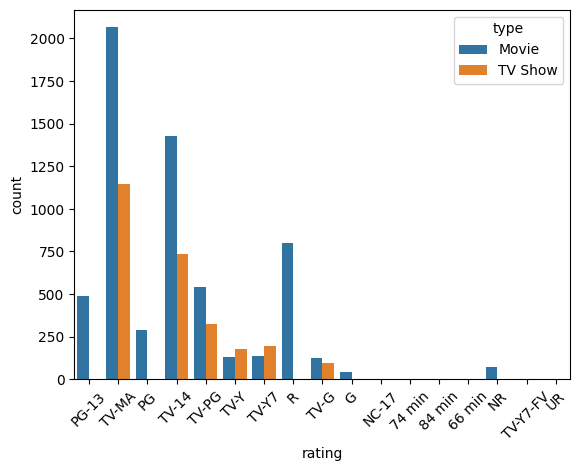

In [36]:
sns.countplot(x='rating', hue='type', data=df)
plt.xticks(rotation= 45)

# Creating Histogram to showcase the Distribution of Movie Durations

Key Insights from the Histogram
- The x-axis (Duration in minutes) represents how long each movie is.
- The y-axis (Frequency) shows the count of movies within a specific duration range.
- Taller bars indicate that more movies fall within those duration brackets.



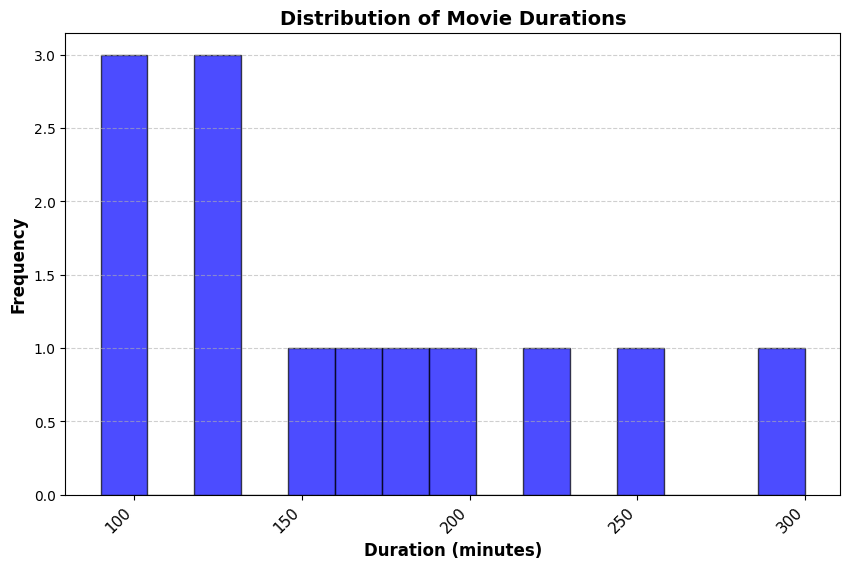

In [37]:
import matplotlib.pyplot as plt

# Sample cleaned duration data (Replace with actual cleaned data)
movie_durations = [90, 91, 125, 100, 120, 130, 150, 160, 180, 200, 220, 250, 300]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=15, color='blue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Duration (minutes)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Movie Durations", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=11)


plt.grid(axis='y', linestyle='--', alpha=0.6) # Add grid lines
plt.show()



In [38]:
df['duration']

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
...,...
8802,158 min
8803,2 Seasons
8804,88 min
8805,88 min


# Missing Values and Outliers Check

In [39]:
import pandas as pd

# Load data (Replace with actual file)
# df = pd.read_excel("cleaned_data.xlsx")

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values:\n", missing_values)

Missing Values:
 show_id         0
type            0
Movie           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
dtype: int64


# Cleaned "Duration " to float
- removed 'min' and then dropped na , since na is for the column 'type' 'TV Shows' for proper distribution
- Extract only numerical movie durations (removes "Season" entries)
- Remove NaN values to clean the dataset
- Check max duration below

In [40]:
import pandas as pd
import re  # For advanced string extraction


df["duration"] = df["duration"].astype(str) #duration is a string

# Extract only numerical movie durations (removes "Season" entries)
df["duration_cleaned"] = df["duration"].apply(lambda x: int(re.search(r"\d+", x).group()) if "min" in x else None)

# Remove NaN values to clean the dataset
df_cleaned = df.dropna(subset=["duration_cleaned"])

# Check max duration
print("Max Movie Duration:", df_cleaned["duration_cleaned"].max())

Max Movie Duration: 312.0


In [41]:
print("Min Movie Duration:" , df["duration_cleaned"].min())
print("Max Movie Duration:",df["duration_cleaned"].max())

Min Movie Duration: 3.0
Max Movie Duration: 312.0


In [42]:
print(df["duration_cleaned"].describe())  # See min, max, mean, etc.
print(df["duration_cleaned"].head())  # Preview values

count    6131.000000
mean       99.572500
std        28.284463
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_cleaned, dtype: float64
0    90.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: duration_cleaned, dtype: float64


# CREATING BOX PLOT WITH CLEAN DATA

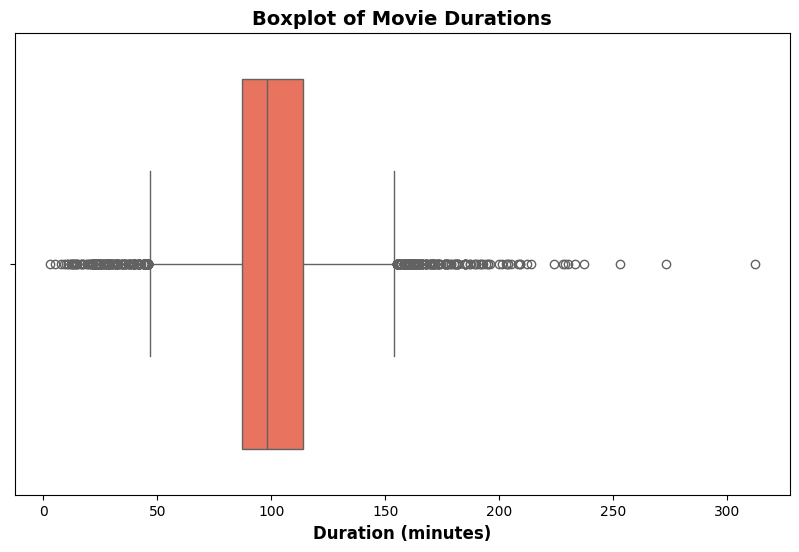

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["duration_cleaned"], color="tomato")

plt.xlabel("Duration (minutes)", fontsize=12, fontweight="bold")
plt.title("Boxplot of Movie Durations", fontsize=14, fontweight="bold")
plt.show()


# Insights for Business Growth
- The Box (Interquartile Range - IQR)
- This captures the middle 50% of Netflix movie durations.If the box is tightly packed, durations are mostly consistent.If it’s spread out, Netflix has a wide range of movie lengths.

# The Median (Line Inside the Box)
- movies tend to be longer or shorter.
- Outliers , these are unusually short or long movies , Netflix might be experimenting with diverse movie lengths.

Insights for Business Growth (Layman Terms)
- Very long movies, market them as "Specials" for deep storytelling.

- long-duration movies are highly watched, consider investing in more extended storytelling projects.
- short movies also watched frequently by busy people , need to invest more on quick watch to keep audiance engagement .



# Bussiness Insights ,content saturation, actor/director patterns

In [44]:
df.head(), df.columns

(  show_id     type                  Movie         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water          Unknown   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans          Unknown   
 4      s5  TV Show           Kota Factory          Unknown   
 
                                                 cast        country  \
 0                                            Unknown  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
 3                                            Unknown        Unknown   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
             date_added  release_year rating   duration  \
 0  2021-09-25 00:00:00          2020  PG-13     90 min   
 1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
 2  2021-

# Cast Insights:
- MOst popular 10 Actors are all indians , this shows indian dominancy
-  Voice Actors & Animation indian dominanc
# Business Growth
- Invest & expand Bollywood and reginal content
- Netflix could invest further in anime content,



In [45]:
# non-null cast values
df_cast = df[df['cast'] != 'Unknown'].copy()
df_cast['cast_list'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast_list')

# Only Top 10 actors
top_actors = df_cast['cast_list'].value_counts().reset_index()
top_actors.columns = ["Actor", "Appearances"]
print(top_actors.head(20))



                Actor  Appearances
0         Anupam Kher           43
1      Shah Rukh Khan           35
2       Julie Tejwani           33
3    Takahiro Sakurai           32
4    Naseeruddin Shah           32
5        Rupa Bhimani           31
6             Om Puri           30
7        Akshay Kumar           30
8           Yuki Kaji           29
9    Amitabh Bachchan           28
10       Paresh Rawal           28
11        Boman Irani           27
12        Rajesh Kava           26
13       Vincent Tong           26
14      Andrea Libman           25
15     Kareena Kapoor           25
16        John Cleese           24
17  Samuel L. Jackson           24
18        Tara Strong           23
19     Jigna Bhardwaj           23


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


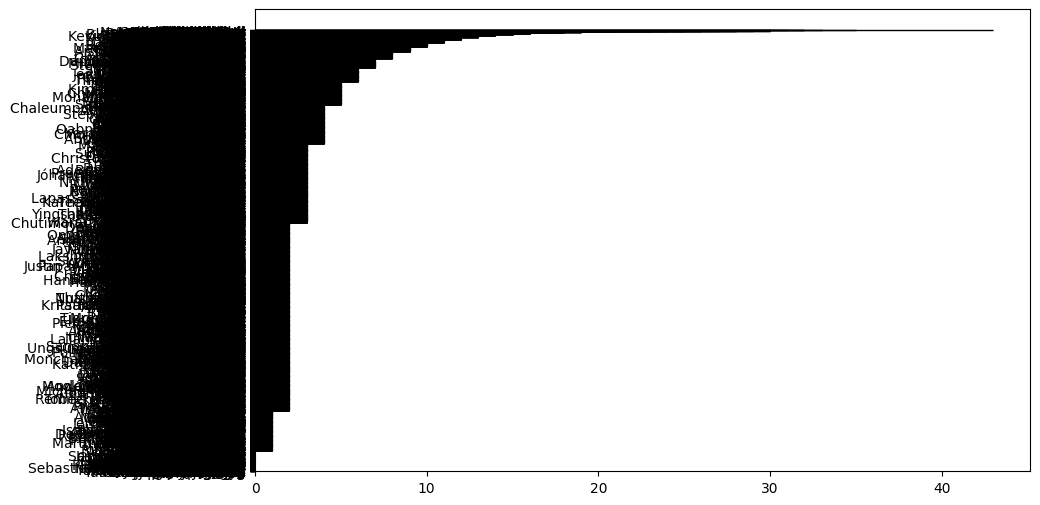

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 actors for visualization
# top_actors = actor_counts.head(10)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Appearances", y="Actor", data=top_actors, hue="Actor", palette="coolwarm", legend=False, edgecolor="black")

# Labels and title
plt.xlabel("Number of Appearances", fontsize=12, fontweight="bold")
plt.ylabel("Actor Name", fontsize=12, fontweight="bold")
plt.title("Top 10 Most Featured Actors on Netflix", fontsize=14, fontweight="bold")

# Show plot
plt.show()

# Count how many movies each director has produced
- rajiv stands out ,producing the highest number of films on Netflix.
- Rajiv as a director has dominated film production ,indicating expertise and  strong collaborations.
- It also means that his content is liked by larger audiences

Business Growth:
 - Netflix could sign exclusive deals to create more content
 - Boost marketing & recommendations for similar styles.





In [48]:
director_counts = df["director"].value_counts().reset_index()
director_counts.columns = ["Director", "Total Movies"]

# Display top directors
print(director_counts.head(10))

                 Director  Total Movies
0                 Unknown          2634
1           Rajiv Chilaka            19
2  Raúl Campos, Jan Suter            18
3             Suhas Kadav            16
4            Marcus Raboy            16
5               Jay Karas            14
6     Cathy Garcia-Molina            13
7         Martin Scorsese            12
8         Youssef Chahine            12
9             Jay Chapman            12


# Filter out 'Unknown' from the director column

- Count known directors

<ipython-input-51-d4a458ba5fa1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors["Total Movies"], y=top_directors["Director"], palette="coolwarm")


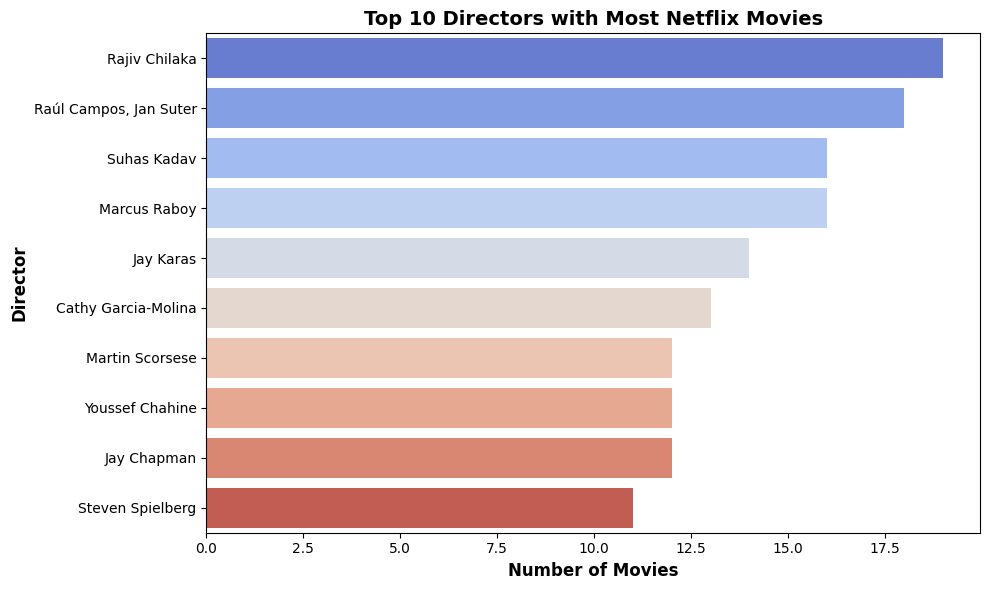

In [51]:

df_known_directors = df[df['director'] != 'Unknown'].copy()


director_counts = df_known_directors['director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Total Movies']

# Select top 10 directors
top_directors = director_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors["Total Movies"], y=top_directors["Director"], palette="coolwarm")
plt.xlabel("Number of Movies", fontsize=12, fontweight="bold")
plt.ylabel("Director", fontsize=12, fontweight="bold")
plt.title("Top 10 Directors with Most Netflix Movies", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


# Recomendation Final Verdict
- Produce more thriller and drama shows in India and America, where most individuals wish to view them.
- Schedule major content releases for October–December to optimize high engagement.
- Develop local content from foreign countries—especially South Korea, Nigeria, and Brazil—to boost global subscriptions.
- Work continually with the top directors to produce and maintain quality.
- Enhance cast/director metadata to make recommendations and viewer personalization more effective.